In [4]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Cargar los datos
df = pd.read_csv('C:\\Users\\Mario\\Documents\\GitHub\\lab-eda-bivariate\\amz_uk_price_prediction_dataset.csv')

# Crear una tabla cruzada entre 'category' e 'isBestSeller'
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calcular el porcentaje de best-sellers en cada categoría
crosstab['percentage'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Ordenar por el porcentaje de best-sellers
crosstab_sorted = crosstab.sort_values('percentage', ascending=False)
print(crosstab_sorted)

isBestSeller                      False  True  percentage
category                                                 
Grocery                            9008   556    0.058135
Smart Home Security & Lighting       98     6    0.057692
Health & Personal Care             9017   552    0.057686
Mobile Phone Accessories            248    11    0.042471
Power & Hand Tools                 8353   306    0.035339
...                                 ...   ...         ...
CD, Disc & Tape Players            8798     0    0.000000
General Music-Making Accessories    259     0    0.000000
Snowboard Boots                    1449     0    0.000000
Boxes & Organisers                  911     0    0.000000
eBook Readers & Accessories         246     0    0.000000

[296 rows x 3 columns]


In [5]:
# Prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(crosstab.iloc[:, :-1])
print(f"Chi-square: {chi2}, p-value: {p}")

# Calcular Cramér's V
n = df.shape[0]
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

Chi-square: 36540.20270061387, p-value: 0.0
Cramér's V: 0.08646709890892415


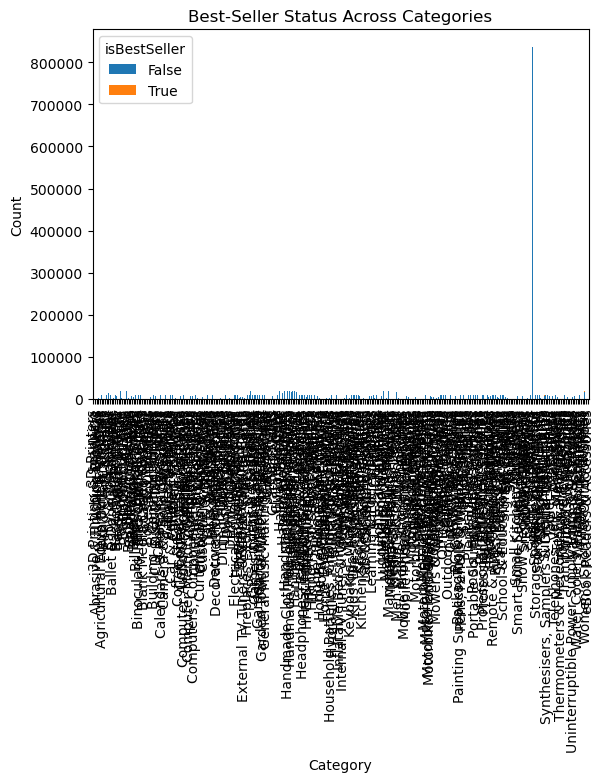

In [6]:
# Crear gráfico de barras apiladas
crosstab.iloc[:, :-1].plot(kind='bar', stacked=True)
plt.title('Best-Seller Status Across Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()

In [7]:
# Calcular el IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los outliers
df_clean = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

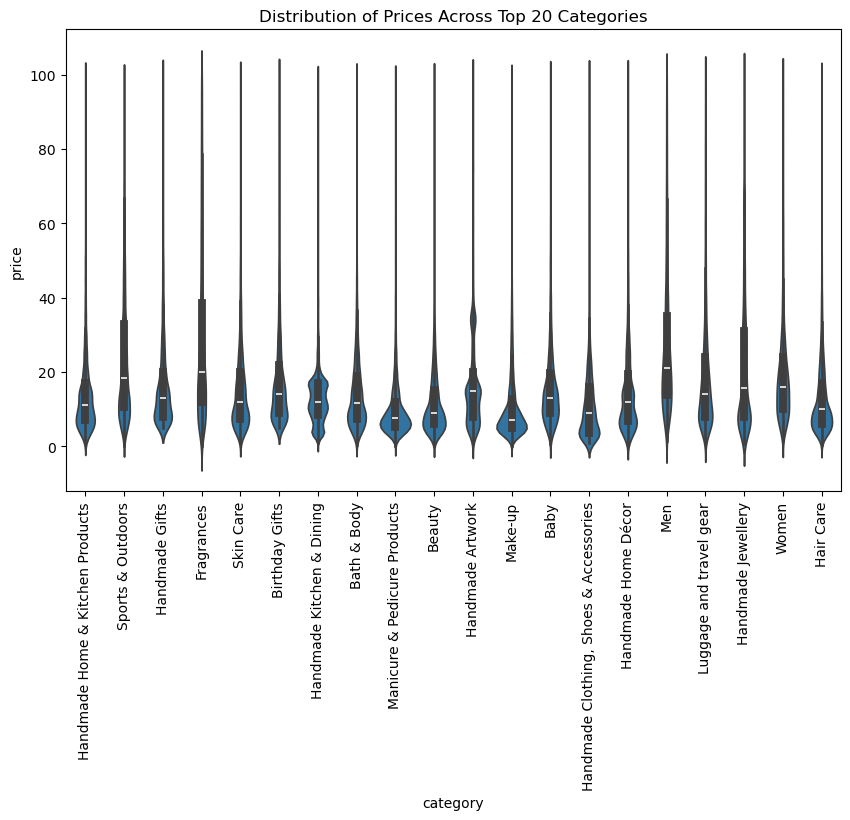

In [8]:
# Filtrar las 20 principales categorías por cantidad
top_categories = df_clean['category'].value_counts().index[:20]
df_top = df_clean[df_clean['category'].isin(top_categories)]

# Crear violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x='category', y='price', data=df_top)
plt.title('Distribution of Prices Across Top 20 Categories')
plt.xticks(rotation=90)
plt.show()

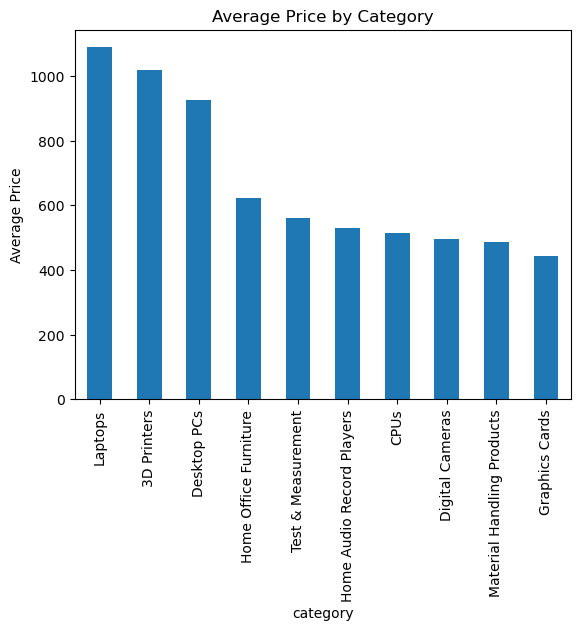

In [9]:
# Calcular el precio promedio por categoría
avg_price_per_category = df.groupby('category')['price'].mean().sort_values(ascending=False).head(10)

# Crear gráfico de barras
avg_price_per_category.plot(kind='bar')
plt.title('Average Price by Category')
plt.ylabel('Average Price')
plt.show()

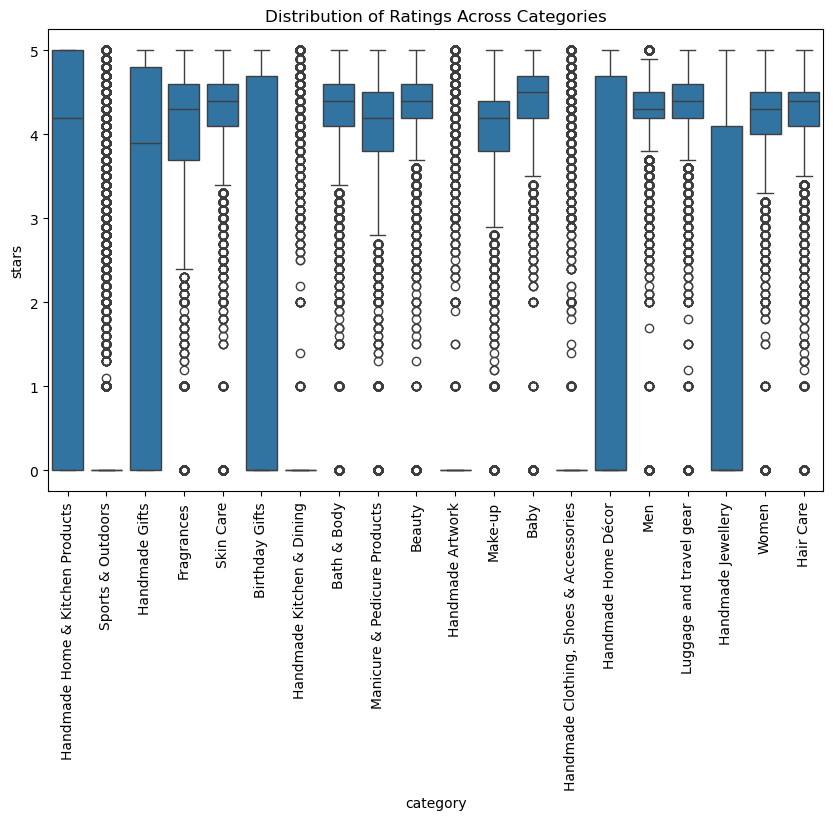

In [10]:
# Crear box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='stars', data=df_top)
plt.title('Distribution of Ratings Across Categories')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Calcular la correlación
corr = df_clean['price'].corr(df_clean['stars'])
print(f'Correlation between price and rating: {corr}')

Correlation between price and rating: -0.0776729987818137


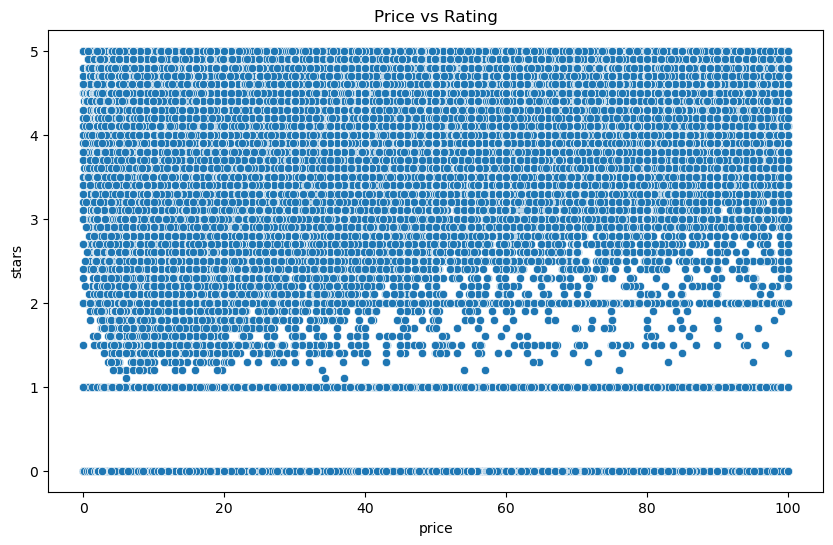

In [12]:
# Crear scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='stars', data=df_clean)
plt.title('Price vs Rating')
plt.show()

In [13]:
# Crear heatmap de correlaciones
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'B09B96TG33'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Crear QQ plot
stats.probplot(df_clean['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.show()